# Work with Image Processing 

## Load Libraries

In [72]:
import os
import winsound

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as py

import cv2

from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf

## Histogram Equalization Function

> Make variety for pixels of image over the grayscale. 
>
> This help to make the image transparent.

In [2]:
def pyEqualization (gray, end_color):
    hist ,bin = np.histogram(gray.flatten(), 256,[0, 256])
    cft = hist.cumsum()

    equali = ( (cft - min(cft)) / (max(cft) - min(cft)) ) * end_color
    equali = equali.astype(np.uint8)

    return equali[gray] 

## Show Function

In [3]:
def show(images, masks = None):
    if (masks == None):
        _, fig = py.subplots(4,1,figsize=(20,20))
        for i in range(4):
            fig[i].imshow(images[i], cmap='gray', vmin=0, vmax=255)
            fig[i].text(320,150,imagesPath[i] + " Image",color= "red")
            pass
        pass
    else:
        _, fig = py.subplots(4,2,figsize=(20,20))
        for i in range(4):
            fig[i,0].imshow(images[i], cmap='gray', vmin=0, vmax=255)
            fig[i,0].text(320,150,imagesPath[i] + " Image",color= "red")
            fig[i,1].imshow(masks[i], cmap='gray', vmin=0, vmax=255)
            fig[i,1].text(280,150,imagesPath[i] + " Mask",color= "red")
            pass
        pass
    py.show()
    pass


## Load a single Image from each class to show the result of each process

In [4]:
path = "DataSet"
imagesPath = os.listdir(path)
imagesPath

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

In [5]:
images, masks = [],[]
 # go to the directory for each class 
for class_ in imagesPath :
    # get the image and its mask 
    image, mask = os.listdir(path+'\\'+ class_) 
    image_path = os.listdir(path+'\\'+ class_ + '\\' + image)[0] 
    mask_path  = os.listdir(path+'\\'+ class_ + '\\' + mask)[0]
    print("First Image of " + class_ + " : " + image_path)
    print("First Mask of " + class_ + " : " + mask_path)
    print("--------------------------------")
    images.append(cv2.imread(path+'\\'+ class_+'\\'+ image + '\\' + image_path))
    masks.append(cv2.imread(path+'\\'+ class_+'\\'+ mask + '\\' + mask_path))
    pass

First Image of COVID : COVID-1.png
First Mask of COVID : COVID-1.png
--------------------------------
First Image of Lung_Opacity : Lung_Opacity-1.png
First Mask of Lung_Opacity : Lung_Opacity-1.png
--------------------------------
First Image of Normal : Normal-1.png
First Mask of Normal : Normal-1.png
--------------------------------
First Image of Viral Pneumonia : Viral Pneumonia-1.png
First Mask of Viral Pneumonia : Viral Pneumonia-1.png
--------------------------------


## Work With Images

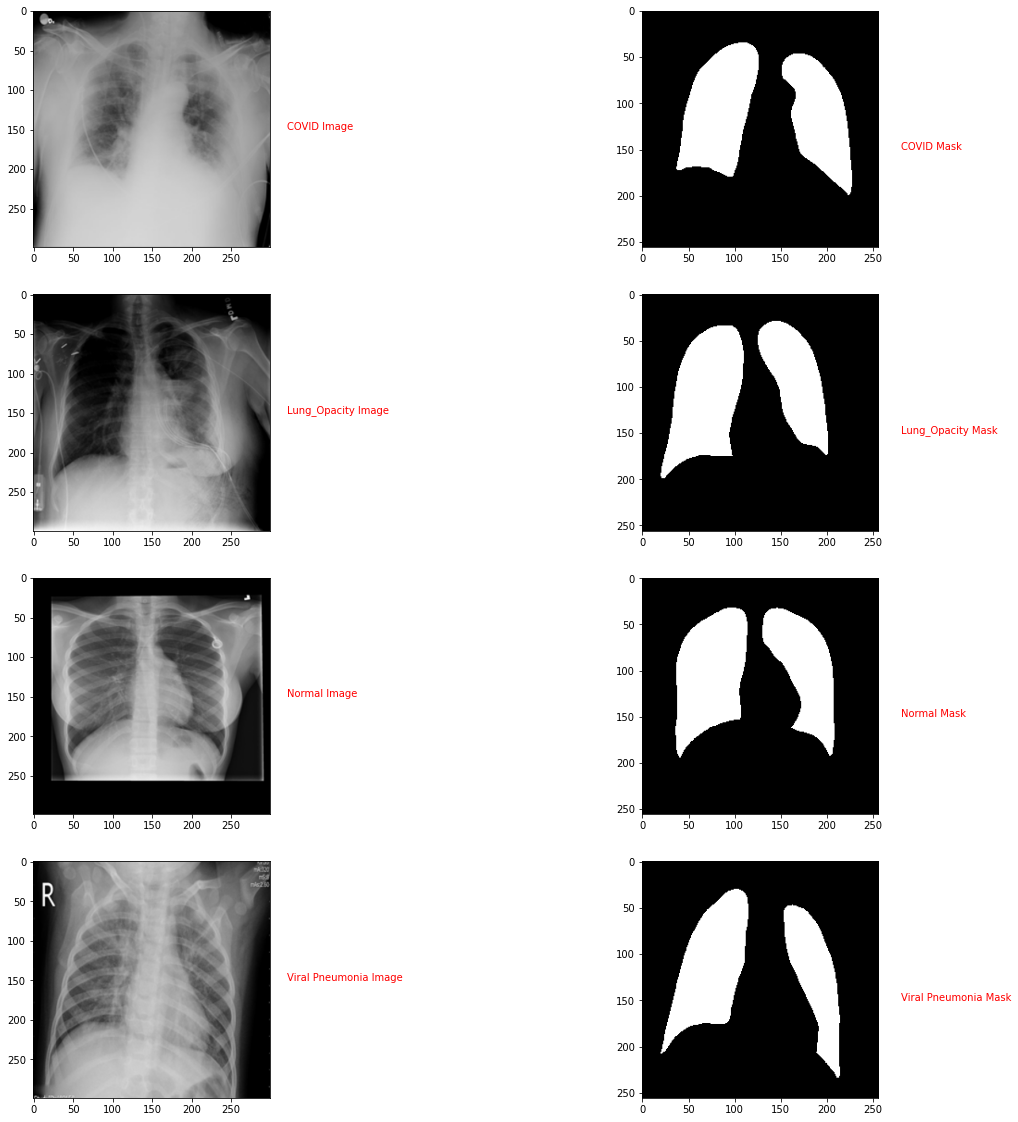

In [6]:
# Show image and its mask
show(images,masks)

In [7]:
# The Shape of each image and class
for i in range(4):
    print("Shape of " + imagesPath[i] + " Image ", np.shape(images[i]))
    print("Shape of " + imagesPath[i] + " Mask ", np.shape(masks[i]))
    pass

Shape of COVID Image  (299, 299, 3)
Shape of COVID Mask  (256, 256, 3)
Shape of Lung_Opacity Image  (299, 299, 3)
Shape of Lung_Opacity Mask  (256, 256, 3)
Shape of Normal Image  (299, 299, 3)
Shape of Normal Mask  (256, 256, 3)
Shape of Viral Pneumonia Image  (299, 299, 3)
Shape of Viral Pneumonia Mask  (256, 256, 3)


>  **Convert Images to GrayScale, instead From RGB**
>
> Here, the colers of image doen't important 

Shape of COVID Image  (299, 299)
Shape of COVID Mask  (256, 256)
Shape of Lung_Opacity Image  (299, 299)
Shape of Lung_Opacity Mask  (256, 256)
Shape of Normal Image  (299, 299)
Shape of Normal Mask  (256, 256)
Shape of Viral Pneumonia Image  (299, 299)
Shape of Viral Pneumonia Mask  (256, 256)


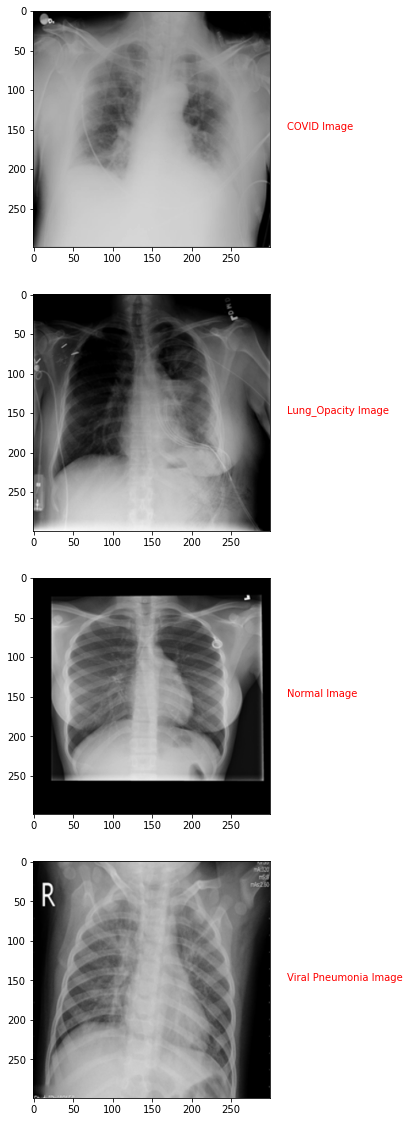

In [8]:
# Change Color Channel
for i in range(4):
    images[i] = cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY)
    masks[i] = cv2.cvtColor(masks[i],cv2.COLOR_BGR2GRAY)
    print("Shape of " + imagesPath[i] + " Image ", np.shape(images[i]))
    print("Shape of " + imagesPath[i] + " Mask ", np.shape(masks[i]))
    pass

# show images after scalling
show(images)

>  **Apply a mask to the image**
>
>  to keep on the chest and ribs (i.s, the important part of the lungs only) 

> First should make the ***mask*** and ***image*** have the same size
>
> Change ***Mask*** size, because in re-size image the value of pixels may be change. 
>
> and ***Information*** should be keep unchanged, in this stage of processing.
>
> also the ***mask*** is contains only **Oness & Zeros**, and ***Re-size*** keep the values the same but not in the orginal position

In [9]:
# all images have the same shape (From README.md of DataSet)
x,y = np.shape(images[0]) 

In [10]:
# change Size of Masks
masks = [cv2.resize(mask,dsize= (x,y)) for mask in masks]
np.shape(masks[2])

(299, 299)

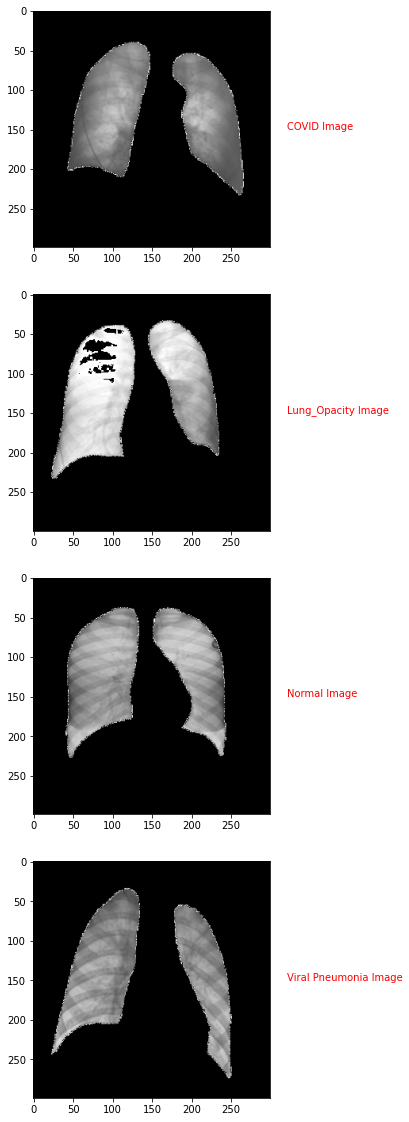

In [11]:
#### Apply Mask on Image
image_new = [np.multiply(masks[i],images[i]) for i in range(4)]
show(image_new,None)

### Try Some Filters to Improve quality of images

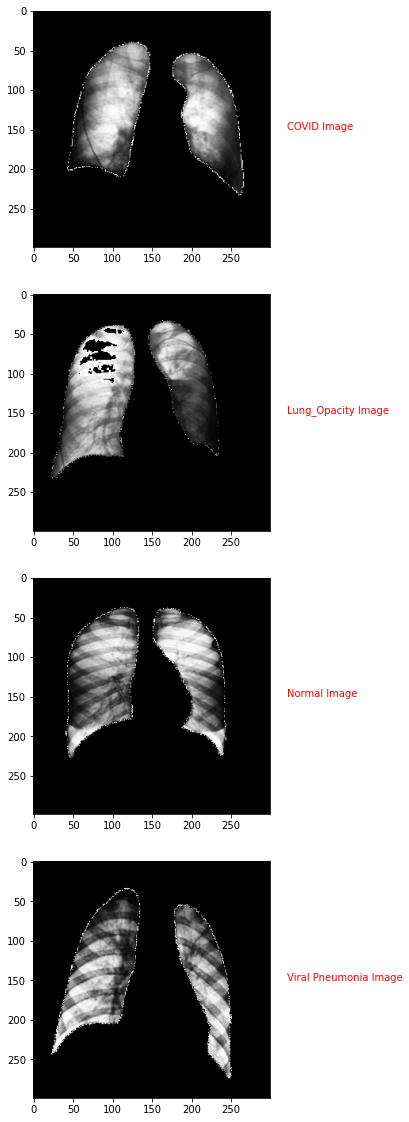

In [12]:
#### Apply Hist Equalization on Image
image_new_eq = [pyEqualization(image,255) for image in image_new]
show(image_new_eq,None)

> It is useful because the picture is more clear, (the chest area). This appears in more clear in the last Image ***Viral Pneumonia***

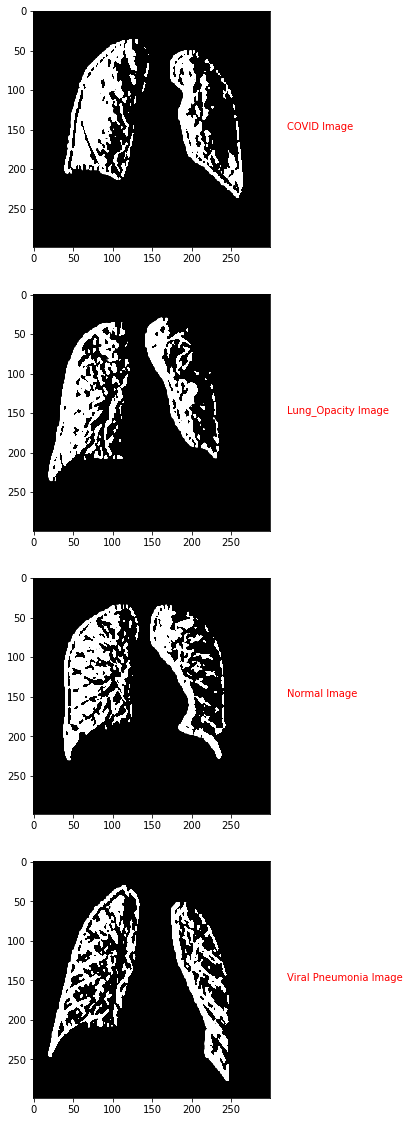

In [13]:
#### Apply Edge Detection Using Sobel Filters over x-asis

image_new_ed = [cv2.Sobel(image,ddepth=cv2.CV_64F,dx=1,dy=0, ksize=7)\
                for image in image_new_eq]
show(image_new_ed,None)

> **Its very useful**. Because it 
>
> Because it is a difference between the four classes, where 
>   + the **covid** class is clear that the lung is ***soft***, without interference or protrusions. 
>   + the **Lung_Opacity** class contains many small outcrops, such as the rock that contains many outcrops. 
>   + the **normal lung** class, it has horizontal lines (they all overlap at a point in the middle of the lung). 
>   +  the **Viral Pneumonia** class, the lung appears to be divided in the form of a network

## Apply on images 

In [28]:
class ImageProcessing :
    '''
    Load Date From @dataSetDir
    
    @return images after apply masks and Filters
            as list contains 5 items  [covid, lung, normal, viral, target] 
            + covid : contains list of covid images
            + lung : contains list of lung opacity images
            + normal : contains list of normal images
            + viral : contains list of viral pneumonia images
            + target : contains list of classes as 
                       0 for covid
                       1 for lung
                       2 for normal
                       3 for viral
    '''
    __globalDir = ""
    __x, __y = 299,299
    __covid_images, __covid_masks, __covid = [], [], [] 
    __lung_images, __lung_masks, __lung = [], [], []
    __normal_images, __normal_masks, __normal = [], [], []
    __viral_images, __viral_masks, __viral = [], [], []
    __target = []
    
    def __init__(self, dataSetDir):
        '''
         @dataSetDir : directory contains all directories of class for images
        ''' 
        self.__globalDir = dataSetDir
        pass      

    def apply(self):
        self.__read()
        print("Read Images Successfully")
        #self.__toGray()
        #print("Convert to Gray Scale Successfully")
        self.__resizeMasks()
        print("Masks are resized Successfully")
        self.__applyMask()
        print("Apply Masks Successfully")
        self.__applyPyEqualization()
        print("Apply Histogram Equalization Successfully")
        self.__applySobal()
        print("Apply Sobel Successfully")
        self.__save()
        print("Saved Successfully")
        pass

    def __read(self):
        # get images & masks for each class
        
        classesPath = os.listdir(self.__globalDir)
        for class_ in classesPath :
            images, masks = os.listdir(self.__globalDir + '/' + class_) 
            if (images == 'masks'):
                images = 'images'
                masks = 'masks'
                pass
            images_path = os.listdir(self.__globalDir + '/' + class_ + '/' + images)
            masks_path  = os.listdir(self.__globalDir + '/' + class_ + '/' + masks)
            
            # load images & masks            
            for path_im in images_path:
                if ( class_ == 'COVID'):
                    self.__covid_images.\
                    append(cv2.imread(self.__globalDir + '/' + class_ + '/'+ images + '/' + path_im,
                                      cv2.IMREAD_GRAYSCALE))
                elif ( class_ == 'Lung_Opacity'):
                    self.__lung_images.\
                    append(cv2.imread(self.__globalDir + '/' + class_ + '/' + images + '/' + path_im,
                                      cv2.IMREAD_GRAYSCALE))
                elif ( class_ == 'Normal'):
                    self.__normal_images.\
                    append(cv2.imread(self.__globalDir + '/' + class_ + '/' + images + '/' + path_im,
                                      cv2.IMREAD_GRAYSCALE))
                else:
                    self.__viral_images.\
                    append(cv2.imread(self.__globalDir + '/' + class_ + '/' + images + '/' + path_im,
                                      cv2.IMREAD_GRAYSCALE))  
                pass
            for path_ma in masks_path:      
                if ( class_ == 'COVID'):
                    self.__covid_masks.\
                    append(cv2.imread(self.__globalDir + '/' + class_ + '/' + masks + '/' + path_ma,
                                      cv2.IMREAD_GRAYSCALE))
                elif ( class_ == 'Lung_Opacity'):
                    self.__lung_masks.\
                    append(cv2.imread(self.__globalDir + '/' + class_ + '/' + masks + '/' + path_ma,
                                      cv2.IMREAD_GRAYSCALE))
                elif ( class_ == 'Normal'):
                    self.__normal_masks.\
                    append(cv2.imread(self.__globalDir + '/' + class_ + '/'+ masks + '/' + path_ma,
                                      cv2.IMREAD_GRAYSCALE))
                else:
                    self.__viral_masks.\
                    append(cv2.imread(self.__globalDir + '/' + class_ + '/' + masks + '/' + path_ma,
                                      cv2.IMREAD_GRAYSCALE))  
                pass
            
        len_ = len(self.__covid_images); i = 0
        while i < len_: 
                if np.shape(self.__covid_images[i]) != (299, 299) or \
                  np.shape(self.__covid_masks[i]) != (256, 256):
                    self.__covid_images.pop(i)
                    self.__covid_masks.pop(i)
                    i = i - 1
                    len_ = len_ - 1
                    pass
                else : self.__target.append(0)
                i = i + 1
            
        len_ = len(self.__lung_images); i = 0
        while i < len_: 
                if np.shape(self.__lung_images[i]) != (299, 299) or \
                  np.shape(self.__lung_masks[i]) != (256, 256):
                    self.__lung_images.pop(i)
                    self.__lung_masks.pop(i)
                    i = i - 1
                    len_ = len_ - 1
                    pass
                else : self.__target.append(1)
                i = i + 1
            
        len_ = len(self.__normal_images); i = 0
        while i < len_: 
                if np.shape(self.__normal_images[i]) != (299, 299) or \
                  np.shape(self.__normal_masks[i]) != (256, 256):
                    self.__normal_images.pop(i)
                    self.__normal_masks.pop(i)
                    i = i - 1
                    len_ = len_ - 1
                    pass
                else : self.__target.append(2)
                i = i + 1
                
        len_ = len(self.__viral_images); i = 0
        while i < len_: 
                if np.shape(self.__viral_images[i]) != (299, 299) or \
                  np.shape(self.__viral_masks[i]) != (256, 256):
                    self.__viral_images.pop(i)
                    self.__viral_masks.pop(i)
                    i = i - 1
                    len_ = len_ - 1
                    pass
                else : self.__target.append(3)
                i = i + 1
                pass
        
        # delete un-used variables
        del i, len_, path_ma, path_im, masks_path, images_path, masks, images, class_, classesPath
        pass
        
    def __resizeMasks(self):
     
            self.__covid_masks = [cv2.resize(np.array(mask, dtype=np.uint8),dsize= (self.__x,self.__y)) \
                                  for mask in self.__covid_masks]
            self.__lung_masks = [cv2.resize(np.array(mask, dtype=np.uint8),dsize= (self.__x,self.__y)) \
                                 for mask in self.__lung_masks]
            self.__normal_masks = [cv2.resize(np.array(mask, dtype=np.uint8),dsize= (self.__x,self.__y)) \
                                   for mask in self.__normal_masks]
            self.__viral_masks = [cv2.resize(np.array(mask, dtype=np.uint8),dsize= (self.__x,self.__y)) \
                                  for mask in self.__viral_masks]
            pass
        
    def __applyMask(self):
            
            _len = len(self.__covid_masks)
            self.__covid = [np.multiply
                            (self.__covid_masks[i], self.__covid_images[i]) for i in range(_len)]
            
            _len = len(self.__lung_masks)
            self.__lung = [np.multiply
                            (self.__lung_masks[i], self.__lung_images[i]) for i in range(_len)]
            
            _len = len(self.__normal_masks)
            self.__normal = [np.multiply
                            (self.__normal_masks[i], self.__normal_images[i]) for i in range(_len)]
            
            _len = len(self.__viral_masks)
            self.__viral = [np.multiply
                            (self.__viral_masks[i], self.__viral_images[i]) for i in range(_len)]
            pass
       
    def __pyEqualization (self, gray, end_color):
            hist ,bin = np.histogram(gray.flatten(), 256,[0, 256])
            cft = hist.cumsum()
            equali = ( (cft - min(cft)) / (max(cft) - min(cft)) ) * end_color
            equali = equali.astype(np.uint8)
            return equali[gray] 
    def __applyPyEqualization(self):
            
            self.__covid = [self.__pyEqualization(image,255) for image in self.__covid]
            self.__lung = [self.__pyEqualization(image,255) for image in self.__lung]
            self.__normal = [self.__pyEqualization(image,255) for image in self.__normal]
            self.__viral = [self.__pyEqualization(image.astype(np.int8),255) for image in self.__viral]
            pass
                           
    def __applySobal(self):
                           
            self.__covid = [cv2.Sobel(image,ddepth=cv2.CV_64F,dx=1,dy=0, ksize=7)\
                             for image in self.__covid]
            self.__lung = [cv2.Sobel(image,ddepth=cv2.CV_64F,dx=1,dy=0, ksize=7)\
                           for image in self.__lung]
            self.__normal = [cv2.Sobel(image,ddepth=cv2.CV_64F,dx=1,dy=0, ksize=7)\
                           for image in self.__normal]
            self.__viral = [cv2.Sobel(image,ddepth=cv2.CV_64F,dx=1,dy=0, ksize=7)\
                            for image in self.__viral]
            pass
      
    def __save(self):  
            path = "DataSet-Handle/Covid"
            #os.mkdir(path) 
            [cv2.imwrite(path + "/Covid - " + str(i+1) + ".png", self.__covid[i]) \
             for i in range(len(self.__covid))]
        
            path = "DataSet-Handle/Lung"
            #os.mkdir(path) 
            [cv2.imwrite(path + "/Lung - " + str(i+1) + ".png", self.__lung[i]) \
             for i in range(len(self.__lung))]
        
            path = "DataSet-Handle/Normal"
            #os.mkdir(path) 
            [cv2.imwrite(path + "/Normal - " + str(i+1) + ".png", self.__normal[i]) \
             for i in range(len(self.__normal))]
        
            path = "DataSet-Handle/Viral"
            #os.mkdir(path) 
            [cv2.imwrite(path + "/Viral - " + str(i+1) + ".png", self.__viral[i]) \
             for i in range(len(self.__viral))]
            
                       
            # delete un-used variables 
            del path
            pass
        

In [22]:
path = "DataSet"
ImageProcessing(path).apply() # 10192

winsound.Beep(1000,2000) 

Read Images Successfully
Convert to Gray Scale Successfully
Masks are resized Successfully
Apply Masks Successfully
Apply Histogram Equalization Successfully
Apply Sobel Successfully
Saved Successfully


###### 
DataSet Contains  after reading **Some images have problems to read**

Class | Number of images
------|-----------------
covid | 3609
lung  | 6000
normal | 10182 
viral | 1345
***total*** | 21136

### Make Re-Sampling as try to solve problem

In [62]:
# Read Data

path = "DataSet-Handle"
covid, normal,lung,viral,target = [],[],[],[],[]

classesPath = os.listdir(path)
for class_ in classesPath :
    images_path = os.listdir(path + '/' + class_ + '/')           
    
    for path_im in images_path:
        if ( class_ == 'Covid'):
            covid.\
            append(cv2.imread(path + '/' + class_ + '/' + path_im, cv2.IMREAD_GRAYSCALE))
            target.append(0)
            
        elif ( class_ == 'Lung'):
            lung.\
            append(cv2.imread(path + '/' + class_ + '/' + path_im, cv2.IMREAD_GRAYSCALE))
            target.append(1)
            
        elif ( class_ == 'Normal'):
            normal.\
            append(cv2.imread(path + '/' + class_ + '/' + path_im, cv2.IMREAD_GRAYSCALE))
            target.append(2)
            
        else:
            viral.\
            append(cv2.imread(path + '/' + class_ + '/' + path_im, cv2.IMREAD_GRAYSCALE))
            target.append(3)
            pass
        pass

data = []
data.extend(covid)
data.extend(lung)
data.extend(normal)
data.extend(viral)

data = np.array(data)
target = np.array(target)


del covid, normal, lung, viral, classesPath, class_, path_im, path

In [67]:
# apply over-sampling
res = RandomOverSampler('all')

data , target = res.fit_resample(data.reshape(data.shape[0],-1), target)

# re-shape as image shape
data = data.reshape((-1,)+ (299,299,1))

print("Size of Dataset After Re-Sampling " , target.shape[0])

C:\ProgramData\Anaconda3\envs\gpu2\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=all as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


Size of Dataset After Re-Sampling  40728


### Split intol ***Train & Validation & Test*** Sets

In [73]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size= 0.20, random_state= 45)
x_train, x_vald, y_train, y_vald = train_test_split(data, target, test_size= 0.25, random_state= 45)

In [83]:
def save(w,x,y):
    path = "DataSet-Handle/" + w + "/"
    l = len(x)
    
    os.mkdir(path+ "Covid")
    path_ = path + "Covid"
    [cv2.imwrite(path_ + "/Covid - " + str(i+1) + ".png", x[i]) \
    for i in range(l) if y[i] == 0]
    
    os.mkdir(path+ "Lung")
    path_ = path + "Lung"
    [cv2.imwrite(path_ + "/Lung - " + str(i+1) + ".png", x[i]) \
    for i in range(l) if y[i] == 1]
    
    os.mkdir(path+ "Normal")
    path_ = path + "Normal"
    [cv2.imwrite(path_ + "/Normal - " + str(i+1) + ".png", x[i]) \
    for i in range(l) if y[i] == 1]
    
    os.mkdir(path+ "Viral")
    path_ = path + "Viral"
    [cv2.imwrite(path_ + "/Viral - " + str(i+1) + ".png", x[i]) \
    for i in range(l) if y[i] == 3]            
                       
    # delete un-used variables 
    del path, path_, l
    pass

In [84]:
save('Validation', x_vald, y_vald)
del save, x_vald, y_vald

# End Image Processing

DataSet Contains  after **over-sampling**

Class | Number of images
------|-----------------
covid | 10182
lung  | 10182
normal | 10182 
viral | 10182
***total*** | 40728